In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tensorflow import keras
import pydot
target_size = 96

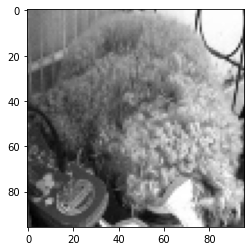

(244, 348)


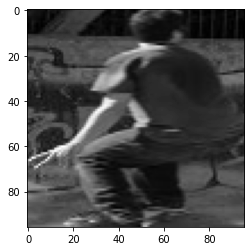

(165, 97)


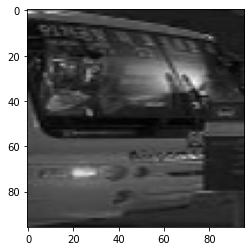

(158, 66)


In [10]:
CATEGORIES = ["animal" , "person" , "vehicle"]

dataDir=os.getcwd() # Chemin du dossier ou s'execute le script
dataDirCoco=dataDir + "\personalCoco"

for category in CATEGORIES :
    path = os.path.join(dataDirCoco,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        img_resized= cv2.resize(img_array,(target_size,target_size))
        plt.imshow(img_resized,cmap="gray")
        plt.show()
        print(img_array.shape)
        break
    


In [15]:
target_size = 96

#création d'un générateur

train_generator=keras.preprocessing.image_dataset_from_directory(
    dataDirCoco,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(target_size, target_size),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

val_generator=keras.preprocessing.image_dataset_from_directory(
    dataDirCoco+"val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(target_size, target_size),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 51835 files belonging to 3 classes.
Found 2179 files belonging to 3 classes.


In [17]:
def build_model( ):
    input_tensor = keras.layers.Input(shape=(target_size, target_size ,3))
    base_model = keras.applications.MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_tensor=input_tensor,
        input_shape=(target_size, target_size, 3),
        pooling='avg')

    for layer in base_model.layers:
        layer.trainable = False  # trainable has to be false in order to freeze the layers
        
    op = keras.layers.Dense(256, activation='relu')(base_model.output)
    op = keras.layers.Dropout(.25)(op)
    output_tensor = keras.layers.Dense(3, activation='softmax')(op)

    model = keras.models.Model(inputs=input_tensor, outputs=output_tensor)


    return model

model=build_model()    
model.compile(
        optimizer=keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
    )

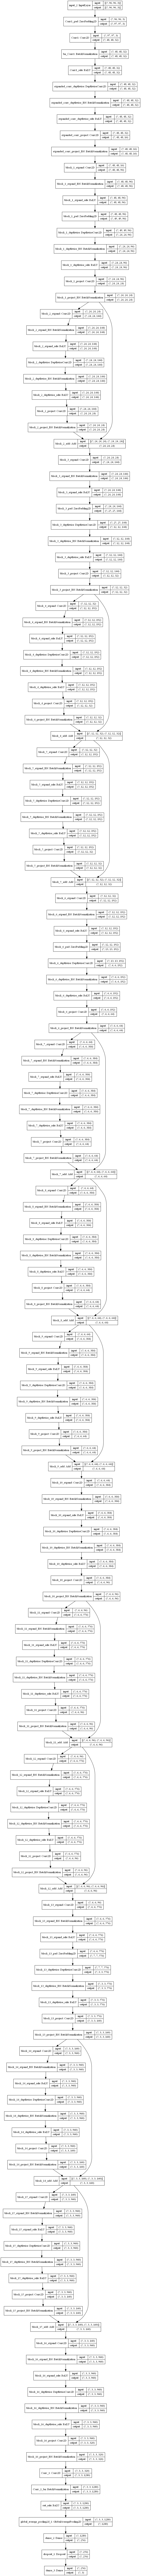

In [7]:
#model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [18]:
epochs = 10

hist=model.fit(train_generator,epochs=epochs,verbose=2)

Epoch 1/10
810/810 - 208s - loss: 0.5093 - accuracy: 0.8070
Epoch 2/10
810/810 - 207s - loss: 0.4441 - accuracy: 0.8320
Epoch 3/10
810/810 - 206s - loss: 0.4306 - accuracy: 0.8388
Epoch 4/10
810/810 - 206s - loss: 0.4174 - accuracy: 0.8420
Epoch 5/10
810/810 - 206s - loss: 0.4061 - accuracy: 0.8459
Epoch 6/10
810/810 - 206s - loss: 0.3991 - accuracy: 0.8504
Epoch 7/10
810/810 - 205s - loss: 0.3923 - accuracy: 0.8523
Epoch 8/10
810/810 - 206s - loss: 0.3884 - accuracy: 0.8542
Epoch 9/10
810/810 - 206s - loss: 0.3791 - accuracy: 0.8556
Epoch 10/10
810/810 - 206s - loss: 0.3761 - accuracy: 0.8578


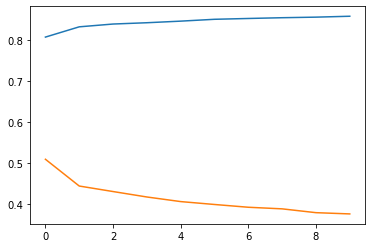

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])

In [30]:
#Sauvegarder le modèle
model_name='mobilenetv2_personalCoco'
save_path=dataDir+'\saved_models\\'+ model_name
model.save(save_path)

INFO:tensorflow:Assets written to: C:\Users\samsa\Desktop\ENSIL\4A\Projet\Git\Detection-silhouettes-humaines-Projet-ELT-ENSIL-ENSCI\saved_models\mobilenetv2_personalCoco\assets


In [31]:
model.evaluate(val_generator,verbose=2)

35/35 - 9s - loss: 0.4164 - accuracy: 0.8435


[0.41640812158584595, 0.8435062170028687]